<a href="https://colab.research.google.com/github/gchinca/Airbnb-Lisboa/blob/main/airbnb_lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANÁLISIS DE DATOS DEL MERCADO AIRBNB EN LISBOA**

El proyecto tiene como objetivo realizar un análisis de datos sobre el mercado de Airbnb en la ciudad de Lisboa, se analiza la distribución geográfica de los alojamientos, sus características y si existen diferencias significativas en los precios según la ubicación y el tipo de propiedad.

Los resultados de este proyecto tienen múltiples aplicaciones, los propietarios de alojamientos podrán obtener información valiosa para optimizar su estrategia de precios y promoción, así como para adaptarse a las necesidades y preferencias de los huéspedes. Por otro lado, los turistas que planeen visitar Lisboa podrán beneficiarse de una mejor comprensión del mercado, lo que les permitirá tomar decisiones informadas al seleccionar alojamientos que se ajusten a sus expectativas y presupuesto.

Actualización dataset: septiembre de 2022

Fuente de información: http://insideairbnb.com/get-the-data/

## **OBJETIVOS DEL PROYECTO**

1. ¿Cuál es el tipo de alojamiento con mejor precio promedio en la ciudad de Lisboa?
2. ¿Cuales son los precios promedio de alojamiento en la ciudad de Lisboa?
3. Determinar la cantidad de alojamientos por rangos de precio: bajo, medio, alto y muy alto
4. Top 5 de zonas con mejor precio promedio
5. Tipo de alojamiento mas ofertado en Lisboa
6. Precio promedio en los alojamientos con hasta 2 habitaciones

## **PROCESO DE EXTRACCIÓN**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lisboa = '/content/drive/MyDrive/Colab Notebooks/PROYECTOS/AIRBNB LISBOA/listings.csv'
airbnb= pd.read_csv(lisboa)


Información del dataset

In [ ]:
airbnb.info()
airbnb.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19651 entries, 0 to 19650
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19651 non-null  int64  
 1   listing_url                                   19651 non-null  object 
 2   scrape_id                                     19651 non-null  int64  
 3   last_scraped                                  19651 non-null  object 
 4   source                                        19651 non-null  object 
 5   name                                          19643 non-null  object 
 6   description                                   19632 non-null  object 
 7   neighborhood_overview                         12526 non-null  object 
 8   picture_url                                   19651 non-null  object 
 9   host_id                                       19651 non-null 

(19651, 75)

In [ ]:
airbnb.head(3)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36664873,https://www.airbnb.com/rooms/36664873,20220913165728,2022-09-13,city scrape,Casa Ferry Holiday House Lisbon 15min & Beach ...,Our portuguese-style house with spacious terra...,Nice quiet village where the river meets the o...,https://a0.muscache.com/pictures/a49ce709-eaac...,275575455,...,4.90,4.76,4.71,42622/AL,t,1,1,0,0,0.56
1,589780527953985801,https://www.airbnb.com/rooms/589780527953985801,20220913165728,2022-09-13,city scrape,La Caz O Soleil de Lapa (sans cuisine),Oubliez vos soucis dans ce logement spacieux e...,"Quartier calme, restaurants a proximités, bar,...",https://a0.muscache.com/pictures/miso/Hosting-...,22145635,...,5.00,4.63,5.00,Exempt,f,1,0,1,0,2.14
2,25345952,https://www.airbnb.com/rooms/25345952,20220913165728,2022-09-14,city scrape,"La maison de la plage, et de la tranquillité",Maison en copropriété privée avec piscine parc...,NaN,https://a0.muscache.com/pictures/142e8803-1846...,175971197,...,4.83,4.28,4.64,Exempt,t,2,2,0,0,0.89


# **TRANSFORMACIÓN**
Se realiza el análisis de las columnas de interés


*   id (integer): Airbnb's unique identifier for the listing
*   neighbourhood_group_cleansed (text): The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
* neighbourhood_group_cleansed (text): The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
*   latitude (numeric): Uses the World Geodetic System (WGS84) projection for latitude and longitude.
*   longitude (numeric): Uses the World Geodetic System (WGS84) projection for latitude and longitude.
*   room_type (text): Entire home/apt, Private room, Shared room, Hotel
* bedrooms (integer): The number of bedrooms
* accommodates (integer): The maximum capacity of the listing
*   price (currency): daily price in local currency
* review_scores_rating                       


In [ ]:
columnas=['id','neighbourhood_cleansed','neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type','bedrooms','accommodates', 'price' , 'review_scores_rating']
listado_resumen=airbnb[columnas]
listado_resumen.head()


,id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,bedrooms,accommodates,price,review_scores_rating
0,36664873,Belm,Lisboa,38.67128,-9.23064,Entire home/apt,3.0,6,$95.00,4.86
1,589780527953985801,Aveiras de Cima,Azambuja,39.16590,-8.88479,Private room,1.0,2,$25.00,5.00
2,25345952,Lourinh e Atalaia,Lourinh,39.30664,-9.33760,Entire home/apt,3.0,6,$65.00,4.78
3,42095537,Estrela,Lisboa,38.68358,-9.15259,Shared room,1.0,1,$14.00,4.33
4,567287540530945227,Carcavelos e Parede,Cascais,38.68436,-9.35110,Entire home/apt,2.0,4,$174.00,4.60


Se filtra la tabla dejando solo la información correspondiente a la ciudad de Lisboa.

In [ ]:
lisboa=listado_resumen[listado_resumen['neighbourhood_group_cleansed'].str.contains('Lisboa', na=False)]
lisboa.head()



,id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,bedrooms,accommodates,price,review_scores_rating
0,36664873,Belm,Lisboa,38.671280,-9.230640,Entire home/apt,3.0,6,$95.00,4.86
3,42095537,Estrela,Lisboa,38.683580,-9.152590,Shared room,1.0,1,$14.00,4.33
7,6499,Belm,Lisboa,38.697500,-9.197680,Entire home/apt,1.0,3,$69.00,4.48
8,25659,Santa Maria Maior,Lisboa,38.712410,-9.127060,Entire home/apt,1.0,3,$54.00,4.78
9,588224448804923698,Estrela,Lisboa,38.684052,-9.154102,Private room,1.0,2,$29.00,4.90


Revisión de columnas con valores faltantes

In [ ]:
lisboa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13629 entries, 0 to 19650
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13629 non-null  int64  
 1   neighbourhood_cleansed        13629 non-null  object 
 2   neighbourhood_group_cleansed  13629 non-null  object 
 3   latitude                      13629 non-null  float64
 4   longitude                     13629 non-null  float64
 5   room_type                     13629 non-null  object 
 6   bedrooms                      12974 non-null  float64
 7   accommodates                  13629 non-null  int64  
 8   price                         13629 non-null  object 
 9   review_scores_rating          12444 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
lisboa.shape

(13629, 10)

Revisión de filas duplicadas

In [ ]:
duplicados = lisboa.duplicated().value_counts().to_dict()
if  duplicados.get(True):
   print(f'Hay {duplicados[True]} filas duplicadas')
else:
   print(f'No hay filas duplicadas')




No hay filas duplicadas


Se realiza limpieza de la columna price y se convierte a tipo float

In [ ]:
lisboa['price'].dtypes

dtype('O')

In [ ]:
lisboa['price']= lisboa['price'].str.strip('$')
lisboa['price'] = lisboa['price'].str.replace(',', '').astype(float)


<ipython-input-13-deee81a5e9f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lisboa['price']= lisboa['price'].str.strip('$')
<ipython-input-13-deee81a5e9f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lisboa['price'] = lisboa['price'].str.replace(',', '').astype(float)


In [ ]:
lisboa['price'].dtypes

dtype('float64')

Revisión de outliers en las columnas numéricas

<ipython-input-15-409be67f6e35>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 1, i+1)


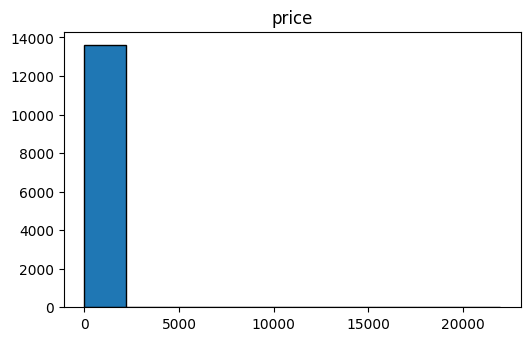

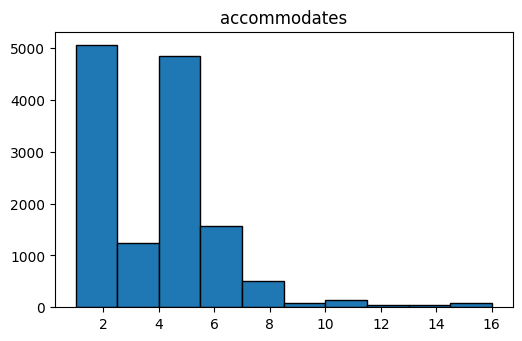

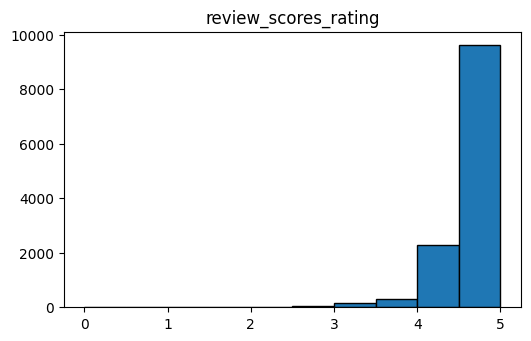

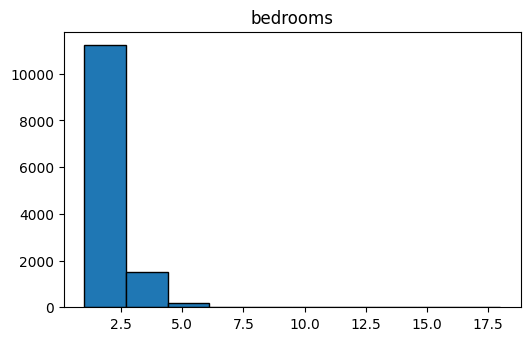

In [ ]:
cols_num = ['price','accommodates','review_scores_rating', 'bedrooms']
cm = 1/2.54  # centimeters in inches


for i, col in enumerate(cols_num):
  plt.subplots(figsize=(15*cm, 50*cm))
  plt.subplots_adjust(hspace=0.5)
  plt.subplot(4, 1, i+1)
  plt.title(col)
  plt.hist(lisboa[col], edgecolor='Black', linewidth=1)
  plt.show()



**Revisión de errores tipográficos**
- Se convierte el contenido de la columna neighbourhood en mayúscula
- Se hace el recuento de valores únicos en las columnas categoricas

In [ ]:
lisboa['neighbourhood_group_cleansed'] = lisboa['neighbourhood_group_cleansed'].str.upper()
col_categorica = ['neighbourhood_cleansed','neighbourhood_group_cleansed', 'room_type']

for col in col_categorica:
 print(f'Columna {col}: {lisboa[col].nunique()} valores únicos')

Columna neighbourhood_cleansed: 24 valores únicos
Columna neighbourhood_group_cleansed: 1 valores únicos
Columna room_type: 4 valores únicos


<ipython-input-16-2c78775c16ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lisboa['neighbourhood_group_cleansed'] = lisboa['neighbourhood_group_cleansed'].str.upper()


In [ ]:
# Se reemplaza NA por 0 en la columna bedrooms
lisboa.fillna({'bedrooms': 0}, inplace=True)

<ipython-input-17-09461e0a7f63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lisboa.fillna({'bedrooms': 0}, inplace=True)


Se almacena el dataset limpio

In [ ]:
ruta='/content/drive/MyDrive/Colab Notebooks/PROYECTOS/AIRBNB LISBOA/lisboa_limpio'
lisboa.to_csv(ruta)

# **ANÁLISIS EXPLORATORIO DEL DATASET**

In [ ]:
# Revisión de datos estadisticos de la columna price
lisboa['price'].describe()

count    13629.000000
mean       134.424903
std        284.788169
min          0.000000
25%         70.000000
50%        100.000000
75%        150.000000
max      22000.000000
Name: price, dtype: float64

In [ ]:
lisboa['price'].median()

100.0

In [ ]:
# Categorización de precio en Bajo, Medio, Alto y Muy Alto
lisboa['price_range'] = lisboa['price'].apply(lambda x: 'Bajo' if x<=100 else 'Medio' if x<=300 else 'Alto' if x<=500 else 'Muy alto')

<ipython-input-21-0b92da62f8b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lisboa['price_range'] = lisboa['price'].apply(lambda x: 'Bajo' if x<=100 else 'Medio' if x<=300 else 'Alto' if x<=500 else 'Muy alto')


In [ ]:
lisboa.head(5)

,id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,bedrooms,accommodates,price,review_scores_rating,price_range
0,36664873,Belm,LISBOA,38.671280,-9.230640,Entire home/apt,3.0,6,95.0,4.86,Bajo
3,42095537,Estrela,LISBOA,38.683580,-9.152590,Shared room,1.0,1,14.0,4.33,Bajo
7,6499,Belm,LISBOA,38.697500,-9.197680,Entire home/apt,1.0,3,69.0,4.48,Bajo
8,25659,Santa Maria Maior,LISBOA,38.712410,-9.127060,Entire home/apt,1.0,3,54.0,4.78,Bajo
9,588224448804923698,Estrela,LISBOA,38.684052,-9.154102,Private room,1.0,2,29.0,4.90,Bajo


Gráfica donde se identifica la cantidad de alojamientos por rango de precio

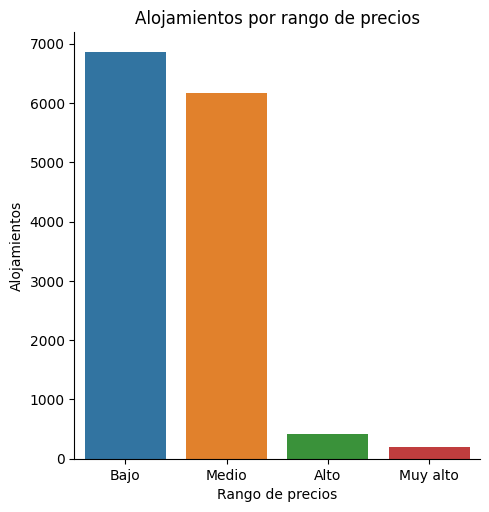

In [ ]:
category_order= ['Bajo', 'Medio', 'Alto', 'Muy alto']
sns.catplot(x='price_range', data=lisboa, kind='count', order=category_order)
plt.title('Alojamientos por rango de precios')
plt.ylabel('Alojamientos')
plt.xlabel('Rango de precios')
plt.show()

Gráfica de barra en la que se identifica la media por cada rango de precio.

💡 **NOTA:** se selecciona la media debido a que se identifica precios muy elevados que pueden sesgar el promedio.

<ipython-input-24-1ee109ef04ff>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='price_range', y='price', kind='bar', data=lisboa, order=category_order, estimator=np.median, ci=None)


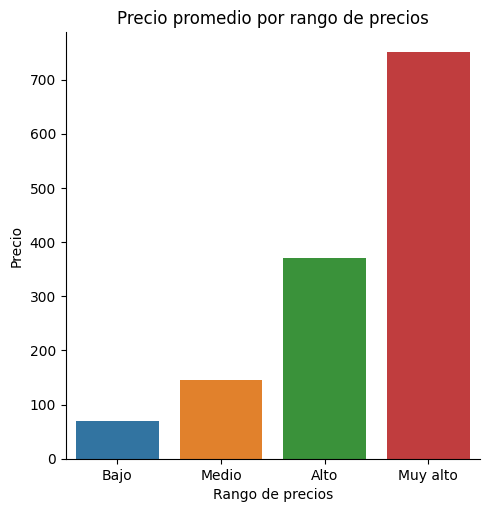

In [ ]:
import numpy as np
category_order= ['Bajo', 'Medio', 'Alto', 'Muy alto']
sns.catplot(x='price_range', y='price', kind='bar', data=lisboa, order=category_order, estimator=np.median, ci=None)
plt.title('Precio promedio por rango de precios')
plt.ylabel('Precio')
plt.xlabel('Rango de precios')
plt.show()

In [ ]:
lisboa.groupby('price_range')['price'].agg(['min', 'max','mean', 'median','count']).round(2)

,min,max,mean,median,count
price_range,,,,,
Alto,301.0,500.0,382.00,371.0,414
Bajo,0.0,100.0,67.20,70.0,6854
Medio,101.0,300.0,158.96,146.0,6170
Muy alto,501.0,22000.0,1217.55,750.0,191


Revisión de precios por tipo de alojamiento

In [ ]:
lisboa.groupby('room_type')['price'].agg(['min', 'max','mean','median']).round(1)

,min,max,mean,median
room_type,,,,
Entire home/apt,14.0,22000.0,146.2,115.0
Hotel room,0.0,1000.0,226.3,125.0
Private room,10.0,8500.0,85.5,56.0
Shared room,11.0,250.0,41.2,31.0


Revisión de la cantidad de alojamientos por tipo

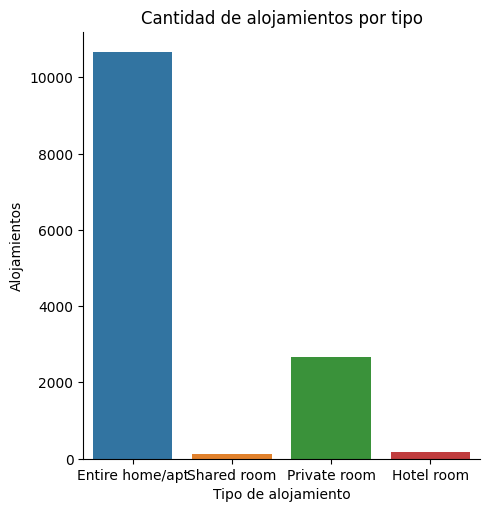

room_type
Entire home/apt    10660
Hotel room           177
Private room        2671
Shared room          121
Name: room_type, dtype: int64

In [ ]:
sns.catplot(x='room_type', data=lisboa, kind='count')
plt.title('Cantidad de alojamientos por tipo')
plt.ylabel('Alojamientos')
plt.xlabel('Tipo de alojamiento')
plt.show()
lisboa.groupby('room_type')['room_type'].count()

In [ ]:
lisboa.groupby('price_range')['id'].count()

price_range
Alto         414
Bajo        6854
Medio       6170
Muy alto     191
Name: id, dtype: int64

Cantidad de alojamientos por barrio

In [ ]:
lisboa.groupby('neighbourhood_cleansed')['id'].count()

neighbourhood_cleansed
Ajuda                      178
Alcntara                   215
Alvalade                   181
Areeiro                    261
Arroios                   1715
Avenidas Novas             487
Beato                       84
Belm                       332
Benfica                     49
Campo de Ourique           268
Campolide                  161
Carnide                     30
Estrela                    915
Lumiar                      74
Marvila                     77
Misericrdia               2340
Olivais                    154
Parque das Naes            258
Penha de Frana             436
Santa Clara                 21
Santa Maria Maior         3151
Santo Antnio              1106
So Domingos de Benfica     103
So Vicente                1033
Name: id, dtype: int64

Cantidad de alojamientos por barrio y por rango de precio

Text(0.5, 0, 'Alojamientos')

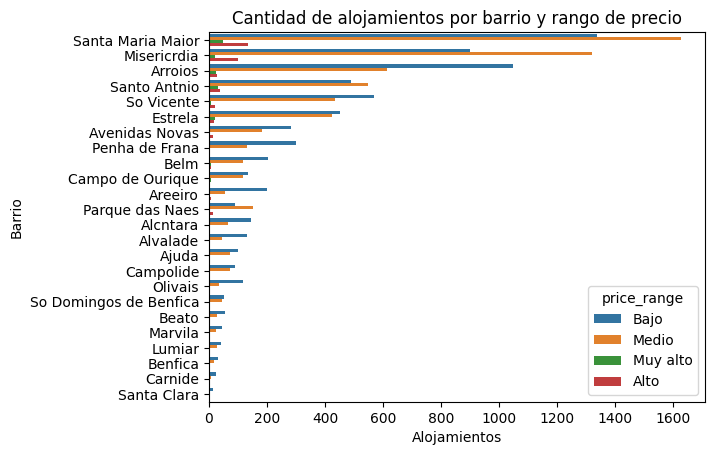

In [ ]:
sns.countplot(data=lisboa, y = 'neighbourhood_cleansed', hue='price_range', order=lisboa['neighbourhood_cleansed'].value_counts().index)
plt.title('Cantidad de alojamientos por barrio y rango de precio')
plt.ylabel('Barrio')
plt.xlabel('Alojamientos')

Barrios con mayor cantidad de alojamientos en airbnb

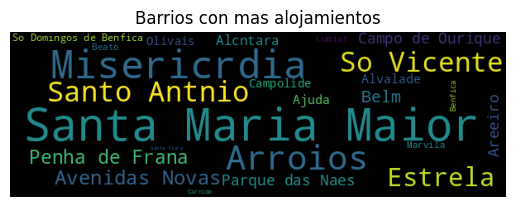

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = lisboa['neighbourhood_cleansed'].value_counts().to_dict()
wc = WordCloud(width = 600, height = 200).generate_from_frequencies(data)
plt.title('Barrios con mas alojamientos')
plt.axis("off")
plt.imshow(wc)



In [ ]:
lisboa.groupby('bedrooms')['price'].median()

bedrooms
0.0       92.0
1.0       82.0
2.0      130.0
3.0      160.0
4.0      214.0
5.0      291.0
6.0      428.5
7.0      380.0
8.0      380.0
9.0      519.0
10.0    1150.0
11.0     567.0
12.0    1194.0
14.0     119.0
16.0    8125.0
18.0    3167.0
Name: price, dtype: float64

<ipython-input-37-5f2a773727fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = lisboa.set_index('id').corr()


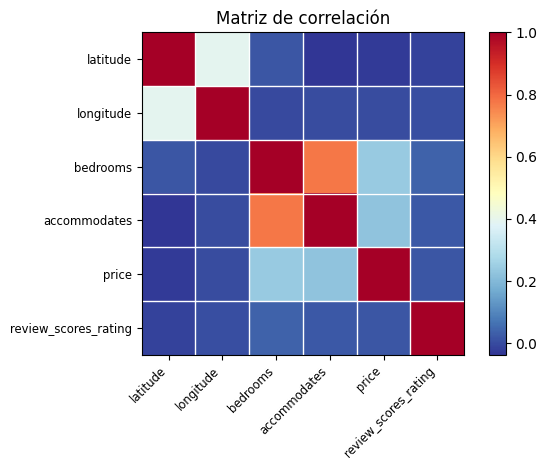

In [ ]:
import statsmodels.api as sm
corr = lisboa.set_index('id').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.title('Matriz de correlación')
plt.show()

# **CONCLUSIONES**
1. El tipo de alojamiento Shared room y Private room tienen como media los mejores precios, seguidos por Entire home/apt y Hotel room.

*   *Shared room*: $31

*   *Private room*: $56

*   *Entire home/apt*: $115

*   *Hotel room*: $125

2. La media de precios en la ciudad de Lisboa está en $100 por noche

3. Cantidad de alojamientos por rangos de precio:
* *Bajo*:	6854
* *Medio*: 6170
* *Alto*:	414
* *Muy alto*: 191

4. Top 5 de zonas con mejor precio promedio
* Santa Maria Maior
* Arroios
* Misericrdia
* So Vicente
* Santo Antnio

5. Entire home/apt es el tipo de alojamiento mas ofertado en Lisboa

6. Precio promedio de alojamientos con hasta 2 habitaciones
* *Loft*: $ 92.0

* *1 habitación*: $ 82.0

* *2 habitaciones*: $ 130.0

